# data reading

In [ ]:
import numpy as np
import pandas as pd
import re
data = pd.read_csv('/content/paa2.csv')
data=data.sample(frac=1)
data=data[:20000]

# collecting nescessary data

In [ ]:
# category={}
# for i in range(len(data)):
#     chatgpt=data.iloc[i]["paraphrases"][1:-1].split(', ')
#     for j in chatgpt[:1]:
#         category[j[1:-1]]='chatgpt'
#     category[data.iloc[i]['text']]="human"
# # category

In [ ]:
category = {}
for i in range(len(data)):
    cell_value = data.iloc[i]["paraphrases"]
    if isinstance(cell_value, str):
        chatgpt = cell_value[1:-1].split(', ')
        for j in chatgpt[:1]:
            category[j[1:-1]] = 'chatgpt'
    category[data.iloc[i]['text']] = "human"


# converting dictionary into dataframe

In [ ]:
data=pd.DataFrame(category.items(),columns=["text","category"])
data=data.sample(frac=1)
data=data[:10000]
data

,text,category
543,How much do olympic gold medalists earn?,human
1348,What is the mechanism behind using headphones ...,chatgpt
535,How do I be a boyfriend?,human
166,What other options are there besides machine l...,chatgpt
1867,What would be the best way to quit smoking?,human
...,...,...
1362,What is the most effective method for investin...,chatgpt
243,Prove that SNR of power = (SNR of voltage) seq...,human
1149,Is there any way to get rid of gynecomastia?,human
387,How can I start civil service exam preparation...,human


In [ ]:
data['category']=data['category'].map({"chatgpt":0,"human":1})
data

,text,category
543,How much do olympic gold medalists earn?,1
1348,What is the mechanism behind using headphones ...,0
535,How do I be a boyfriend?,1
166,What other options are there besides machine l...,0
1867,What would be the best way to quit smoking?,1
...,...,...
1362,What is the most effective method for investin...,0
243,Prove that SNR of power = (SNR of voltage) seq...,1
1149,Is there any way to get rid of gynecomastia?,1
387,How can I start civil service exam preparation...,1


In [ ]:
data["category"].value_counts()

1    999
0    999
Name: category, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X=data['text']
y=data['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# vectorizing using tfidf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
X_train=X_train_tfidf.toarray()
X_test=X_test_tfidf.toarray()

In [ ]:
print(X_train_tfidf.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# BERT

# importing state-of-the-art classifiers

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier

In [ ]:
lg = LogisticRegression(penalty='l1',solver='liblinear')
sv = SVC(kernel='sigmoid',gamma=1.0, probability=True)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
knn = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bg = BaggingClassifier(n_estimators=50,random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [ ]:
from sklearn import metrics

In [ ]:
def score_prediction(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    pr = model.predict(X_test)
    acc_score = metrics.accuracy_score(y_test,pr)
    pre_score = metrics.precision_score(y_test,pr,average="binary", pos_label="chatgpt")
    recall= metrics.recall_score(y_test,pr,average="binary", pos_label="chatgpt")
    f1= metrics.f1_score(y_test,pr,average="binary", pos_label="chatgpt")
    mcc= metrics.matthews_corrcoef(y_test,pr)
    return acc_score,pre_score,recall,f1,mcc

In [ ]:
acc_score = {}
pre_score = {}
recall_score={}
f1_score={}
mcc_score={}
clfs= {
    'LR':lg,
    'DTC':dtc,
    'KNN':knn,
    'RFC':rfc,
    'ETC':etc,
    'ABC':abc,
    'BG':bg,
    'GBC':gbc,
#     'XGB':xgb
}


In [ ]:
# for name,clf in clfs.items():
#     acc_score[name],pre_score[name],recall_score[name],f1_score[name],mcc_score[name] = score_prediction(clf,X_train_tfidf,X_test_tfidf,y_train,y_test)

In [ ]:
acc_score

{}

In [ ]:
pre_score

{}

In [ ]:
recall_score

{}

In [ ]:
f1_score

{}

In [ ]:
mcc_score

{}

# the best performance is provided by extra-tree-classifier

In [ ]:
etc.fit(X_train_tfidf,y_train)

ExtraTreesClassifier(n_estimators=50, random_state=2)

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred =etc.predict(X_test_tfidf)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[145  61]
 [ 52 142]]


In [ ]:
y_test.value_counts()

0    206
1    194
Name: category, dtype: int64

# confusion matrix

<Axes: xlabel='Predicted', ylabel='Actual'>

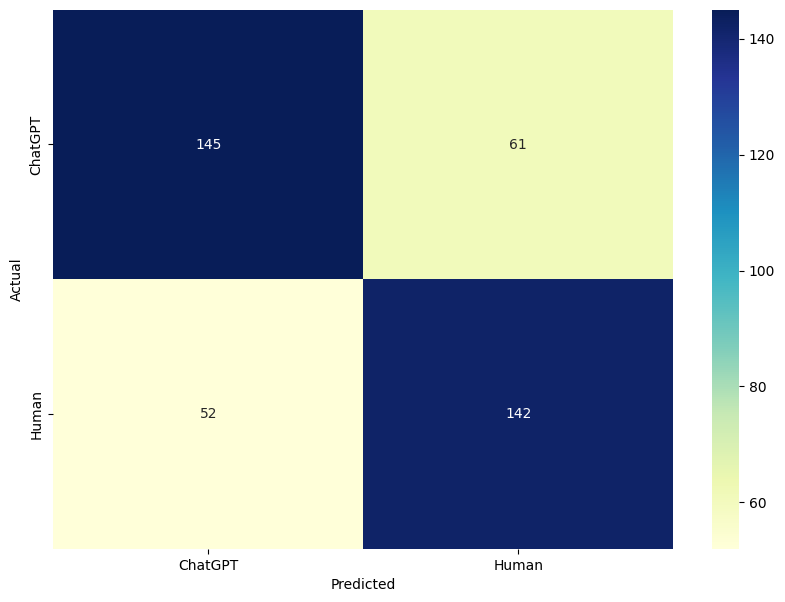

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(cm, index = [i for i in ["ChatGPT","Human"]],
                  columns = [i for i in ["ChatGPT","Human"]])
df_cm.index.name="Actual"
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap="YlGnBu", fmt='g')

# roc curve

In [ ]:
from sklearn.metrics import roc_curve,auc
y_prob = etc.predict_proba(X_test_tfidf)[:, 1]

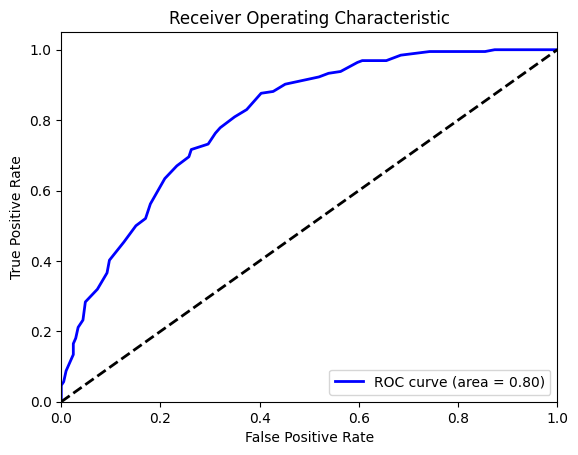

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
probas = {}
for name, model in clfs.items():
    print(name)
    model.fit(X_train, y_train)
    probas[name] = model.predict_proba(X_test)[:, 1]

LR
DTC
KNN
RFC
ETC
ABC
BG
GBC


In [ ]:
probas

{'LR': array([0.4927282 , 0.66649036, 0.56181557, 0.24557213, 0.51962431,
        0.80714136, 0.17337316, 0.48197672, 0.75103179, 0.89844681,
        0.92886861, 0.06704094, 0.16870849, 0.98098495, 0.0537812 ,
        0.97820306, 0.84194602, 0.19731335, 0.78374087, 0.65130545,
        0.40544171, 0.26186007, 0.38087662, 0.53268878, 0.41755406,
        0.37700956, 0.14707138, 0.18137133, 0.53268878, 0.45357122,
        0.73505908, 0.53005985, 0.24836753, 0.32482731, 0.48795225,
        0.39814689, 0.8640981 , 0.11414114, 0.41501544, 0.89902186,
        0.18352945, 0.43256614, 0.23818341, 0.07430476, 0.43476336,
        0.85649594, 0.99100168, 0.72729685, 0.53903508, 0.04138615,
        0.21125181, 0.8278994 , 0.27438575, 0.37745627, 0.91521776,
        0.44371411, 0.70928692, 0.42647658, 0.43068091, 0.73466117,
        0.35236997, 0.77153039, 0.98364871, 0.35807762, 0.48921045,
        0.6370345 , 0.81255404, 0.53268878, 0.52266437, 0.58658936,
        0.3848383 , 0.47869521, 0.10971698

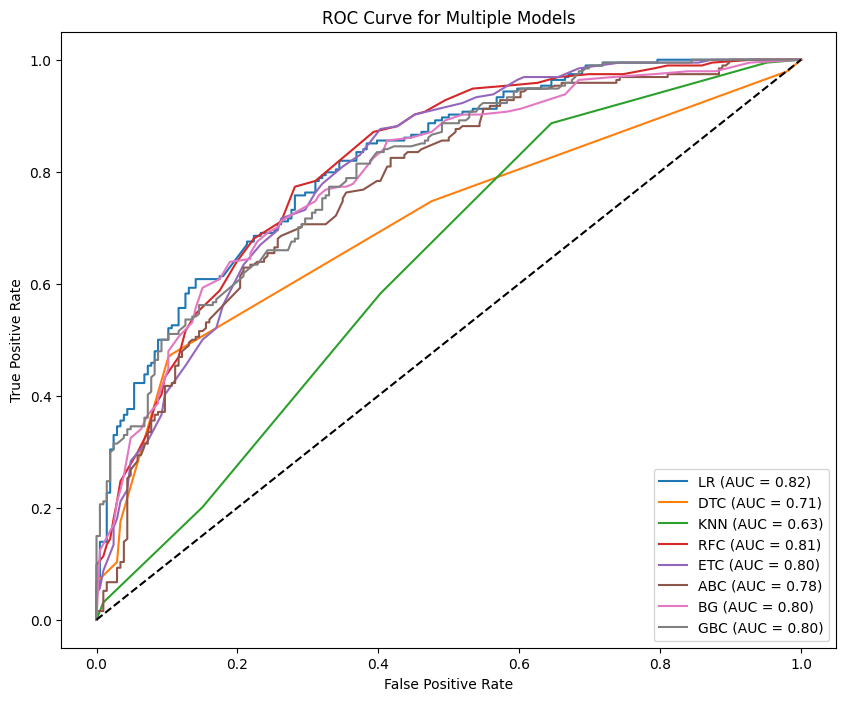

In [ ]:
plt.figure(figsize=(10, 8))
for name, proba in probas.items():
    fpr, tpr, thresholds = roc_curve(y_test, proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Add some labels and legends
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiple Models')
plt.legend(loc='lower right')
plt.show()

In [ ]:
plt.savefig("output.png")

<Figure size 640x480 with 0 Axes>

In [ ]:
print(X_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
print(X_train.shape)

(1598, 3472)


In [ ]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,LSTM
from sklearn import metrics
_,input_shape=X_train.shape
model = Sequential()
model.add(Dense(64,input_shape = (1,), activation = 'relu'))
model.add(keras.layers.RepeatVector(32))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1,activation='sigmoid'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 64)                128       
                                                                 
 repeat_vector_1 (RepeatVec  (None, 32, 64)            0         
 tor)                                                            
                                                                 
 dense_8 (Dense)             (None, 32, 32)            2080      
                                                                 
 dense_9 (Dense)             (None, 32, 16)            528       
                                                                 
 dense_10 (Dense)            (None, 32, 32)            544       
                                                                 
 dense_11 (Dense)            (None, 32, 64)            2112      
                                                      

In [ ]:
model.compile(loss='binary_crossentropy',metrics=['accuracy',])
model.fit(X_train, y_train, epochs=15, batch_size=128,verbose=2)

Epoch 1/15
13/13 - 2s - loss: 0.6932 - accuracy: 0.5069 - 2s/epoch - 135ms/step
Epoch 2/15
13/13 - 0s - loss: 0.6882 - accuracy: 0.6126 - 187ms/epoch - 14ms/step
Epoch 3/15
13/13 - 0s - loss: 0.6564 - accuracy: 0.7015 - 183ms/epoch - 14ms/step
Epoch 4/15
13/13 - 0s - loss: 0.5632 - accuracy: 0.8135 - 186ms/epoch - 14ms/step
Epoch 5/15
13/13 - 0s - loss: 0.4279 - accuracy: 0.9093 - 180ms/epoch - 14ms/step
Epoch 6/15
13/13 - 0s - loss: 0.3076 - accuracy: 0.9506 - 184ms/epoch - 14ms/step
Epoch 7/15
13/13 - 0s - loss: 0.2055 - accuracy: 0.9806 - 197ms/epoch - 15ms/step
Epoch 8/15
13/13 - 0s - loss: 0.1351 - accuracy: 0.9856 - 188ms/epoch - 14ms/step
Epoch 9/15
13/13 - 0s - loss: 0.0799 - accuracy: 0.9900 - 178ms/epoch - 14ms/step
Epoch 10/15
13/13 - 0s - loss: 0.0552 - accuracy: 0.9900 - 186ms/epoch - 14ms/step
Epoch 11/15
13/13 - 0s - loss: 0.0458 - accuracy: 0.9906 - 172ms/epoch - 13ms/step
Epoch 12/15
13/13 - 0s - loss: 0.0417 - accuracy: 0.9906 - 191ms/epoch - 15ms/step
Epoch 13/15
13/

In [ ]:
yPred=model.predict(X_test)

13/13 [==============================] - 0s 5ms/step


In [ ]:
print(yPred)

[[[0.97782224]
  [0.97782224]
  [0.97782224]
  ...
  [0.97782224]
  [0.97782224]
  [0.97782224]]

 [[0.02637069]
  [0.02637069]
  [0.02637069]
  ...
  [0.02637069]
  [0.02637069]
  [0.02637069]]

 [[0.8363575 ]
  [0.8363575 ]
  [0.8363575 ]
  ...
  [0.8363575 ]
  [0.8363575 ]
  [0.8363575 ]]

 ...

 [[0.9950347 ]
  [0.9950347 ]
  [0.9950347 ]
  ...
  [0.9950347 ]
  [0.9950347 ]
  [0.9950347 ]]

 [[0.4194392 ]
  [0.4194392 ]
  [0.4194392 ]
  ...
  [0.4194392 ]
  [0.4194392 ]
  [0.4194392 ]]

 [[0.9858568 ]
  [0.9858568 ]
  [0.9858568 ]
  ...
  [0.9858568 ]
  [0.9858568 ]
  [0.9858568 ]]]


In [ ]:
# print(model.predict)
print(X_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
x=[]
for i in yPred:
    x.append(i[0])

In [ ]:
probas["LSTM"]=np.squeeze(x)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer1 = TfidfVectorizer()
var1_tfidf = vectorizer1.fit_transform(['Hello, This is team PAA'])
# X_test_tfidf = vectorizer1.transform(X_test)
var1=var1_tfidf.toarray()
print(var1)
# X_test=X_test_tfidf.toarray()

[[0.4472136 0.4472136 0.4472136 0.4472136 0.4472136]]


In [ ]:
var1.shape

(1, 5)

In [ ]:
ans=model.predict(var1)
print(ans)

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_1' (type Sequential).
    
    Input 0 of layer "dense_7" is incompatible with the layer: expected axis -1 of input shape to have value 1, but received input with shape (None, 5)
    
    Call arguments received by layer 'sequential_1' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 5), dtype=float32)
      • training=False
      • mask=None
